In [1]:
# cifar-10.npz
# https://www.kaggle.com/datasets/guesejustin/cifar10-keras-files-cifar10load-data

In [49]:
# https://www.geeksforgeeks.org/deep-learning/cifar-10-image-classification-in-tensorflow/
# https://cv.gluon.ai/build/examples_classification/dive_deep_cifar10.html
# https://medium.com/data-science/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
# https://www.kaggle.com/code/amyjang/tensorflow-cifar10-cnn-tutorial
# https://www.tensorflow.org/tutorials/load_data/numpy
# https://www.kaggle.com/code/richardcsuwandi/convolutional-neural-network-on-cifar10-dataset
# https://www.askpython.com/python/examples/cifar-10-dataset
# https://keras.io/api/datasets/cifar10/

# https://www.geeksforgeeks.org/python/python-convert-numpy-arrays-to-tuples/
# https://numpy.org/doc/2.2/reference/generated/numpy.load.html
# https://medium.com/@nsidana123/using-convolutional-neural-networks-on-the-cifar-10-dataset-1a2dc394cdd0

In [136]:
from glob import glob
import matplotlib
from tqdm import tqdm
import imagehash
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from collections import namedtuple
from hashlib import sha1

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

from decimal import Decimal

import kagglehub

%matplotlib inline

In [ ]:
#----------------------------------------------------

In [84]:
print("CIFAR-10 Data...")
cifar10 = tf.keras.datasets.cifar10

# (train_images, train_labels), (test_images, test_labels)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print("Train Shape: ", x_train.shape)
print("Test Shape: ", x_test.shape)

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

CIFAR-10 Data...
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Train Shape:  (50000, 32, 32, 3)
Test Shape:  (10000, 32, 32, 3)


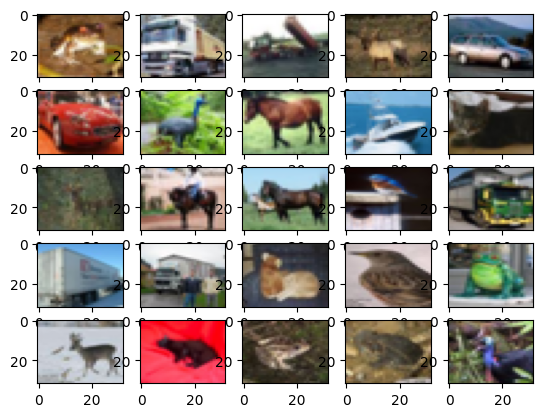

In [85]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

fig, ax = plt.subplots(5, 5)
z = 0
for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[z], aspect='auto')
        z += 1
plt.show()

In [112]:
CLASSES_NUMBER = len(set(y_train))
print("number of classes:", CLASSES_NUMBER)
assert CLASSES_NUMBER == 10
assert len(x_train) == len(y_train)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("Classes:")
for i in class_names:
    print("\t", i)

number of classes: 10
Classes:
	 airplane
	 automobile
	 bird
	 cat
	 deer
	 dog
	 frog
	 horse
	 ship
	 truck


In [87]:
for i in range(2):
    print(x_train[i])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [82]:
for i in range(2):
    print(y_train[i])

6
9


In [102]:
print("Train Data Coeficients...")
k = CLASSES_NUMBER
ipc = x_train.shape[0] // k
w = x_train.shape[1]
h = x_train.shape[2]
c = x_train.shape[3]
print("Train Classes Number: ", k)
print("Train Images per Class: ", ipc)
print("Train W: ", w)
print("Train H: ", h)
print("Train C: ", c)
print('Data Type (Image):', x_train.dtype)
print('Data Size (Image):', x_train.size)
print('Data Shape (Image):', x_train.shape)
print('Data Dimension (Image):', x_train.ndim)
print('Data TypeG (Image):', type(x_train))
print('Data TypeGE (Image):', type(x_train[0]))
print('Data Type (Title):', y_train.dtype)
print('Data Size (Title):', y_train.size)
print('Data Shape (Title):', y_train.shape)
print('Data Dimension (Title):', y_train.ndim)
print('Data TypeG (Title):', type(y_train))
print('Data TypeGE (Title):', type(y_train[0]))

Train Data Coeficients...
Train Classes Number:  10
Train Images per Class:  5000
Train W:  32
Train H:  32
Train C:  3
Data Type (Image): float64
Data Size (Image): 153600000
Data Shape (Image): (50000, 32, 32, 3)
Data Dimension (Image): 4
Data TypeG (Image): <class 'numpy.ndarray'>
Data TypeGE (Image): <class 'numpy.ndarray'>
Data Type (Title): uint8
Data Size (Title): 50000
Data Shape (Title): (50000,)
Data Dimension (Title): 1
Data TypeG (Title): <class 'numpy.ndarray'>
Data TypeGE (Title): <class 'numpy.uint8'>


In [127]:
#data_train_list = list(zip(x_train, y_train))
#for i in range(2):
#  print(data_train_list[i])

#data_train_list = [(x, y) for x, y in zip(x_train, y_train)]
#for i in range(2):
#  print(data_train_list[i])

data_train_list = []
for i in range(len(x_train)):
    data_train_list.append((x_train[i], y_train[i]))
for i in range(2):
  print(data_train_list[i])

sorted_data_train_list_by_title = sorted(data_train_list, key = lambda tup: tup[1])
#res = sorted(a, key=itemgetter(1))
for i in range(2):
  print(sorted_data_train_list_by_title[i])

for i in range(2):
  print(data_train_list[i])

for i in range(2):
  print(hash(str(sorted_data_train_list_by_title[i])))

#for i in range(2):
#  print(pd.util.hash_array(sorted_data_train_list_by_title))

#for i in range(2):
#  print(sha1(sorted_data_train_list_by_title[i]).hexdigest())

(array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 

In [ ]:
#----------------------------------------------------------------

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


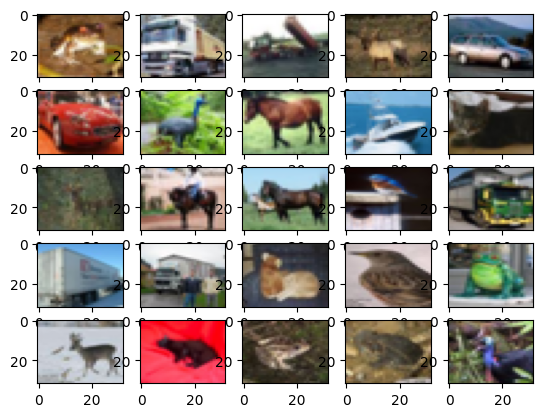

number of classes: 10


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 93ms/step - accuracy: 0.5615 - loss: 1.2789 - val_accuracy: 0.5804 - val_loss: 1.1904
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.7076 - loss: 0.8414 - val_accuracy: 0.6692 - val_loss: 0.9868
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.7635 - loss: 0.6861 - val_accuracy: 0.7497 - val_loss: 0.7325
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 88ms/step - accuracy: 0.8003 - loss: 0.5811 - val_accuracy: 0.7644 - val_loss: 0.7133
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.8286 - loss: 0.5000 - val_accuracy: 0.7866 - val_loss: 0.6698
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 144s 92ms/step - accuracy: 0.8543 - loss: 0.4260 - val_accuracy: 0.8069 - val_loss: 0.5889
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 94ms/step - accuracy: 0.8770 - loss: 0.3563 - val_accuracy: 0.8083 - val_loss: 0.6130
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 134s 86ms/step - accuracy: 

C:\Users\user1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 159s 102ms/step - accuracy: 0.8233 - loss: 0.5566 - val_accuracy: 0.8347 - val_loss: 0.5179
Epoch 2/50
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:23 92ms/step - accuracy: 0.8125 - loss: 0.6141

C:\Users\user1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8125 - loss: 0.6141 - val_accuracy: 0.8338 - val_loss: 0.5181
Epoch 3/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.8539 - loss: 0.4469 - val_accuracy: 0.8452 - val_loss: 0.4592
Epoch 4/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8438 - loss: 0.5331 - val_accuracy: 0.8445 - val_loss: 0.4594
Epoch 5/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.8650 - loss: 0.4067 - val_accuracy: 0.8523 - val_loss: 0.4616
Epoch 6/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7812 - loss: 0.4329 - val_accuracy: 0.8531 - val_loss: 0.4608
Epoch 7/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 158s 101ms/step - accuracy: 0.8679 - loss: 0.3927 - val_accuracy: 0.8341 - val_loss: 0.5115
Epoch 8/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8438 - loss: 0.3882 - val_accuracy: 0.8342 - val_loss: 0.5114
Epoch 9/50
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 67803s 43s/step - accuracy: 0.8770 - loss: 0.36

Original label is cat and predicted label is cat


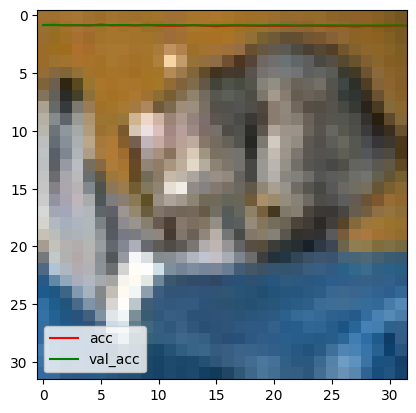

In [128]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()

# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
    for j in range(5):
        ax[i][j].imshow(x_train[k], aspect='auto')
        k += 1

plt.show()

# number of classes
K = len(set(y_train))

# calculate total number of classes 
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()

# Compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit
r = model.fit(
  x_train, y_train, validation_data=(x_test, y_test), epochs=50)

# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
              steps_per_epoch=steps_per_epoch, epochs=50)

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()

# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and 
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))

# save the model
model.save('geeksforgeeks.h5')

In [ ]:
#---------------------------------------------------

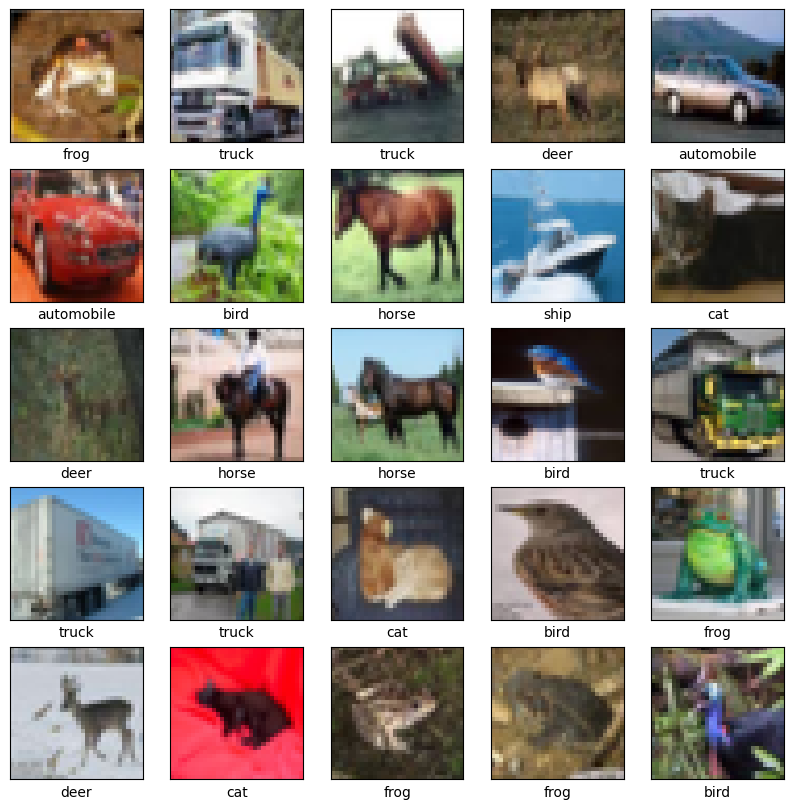

C:\Users\user1\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4531 - loss: 1.5005 - val_accuracy: 0.5734 - val_loss: 1.1930
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.5950 - loss: 1.1427 - val_accuracy: 0.6059 - val_loss: 1.0998
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6483 - loss: 0.9983 - val_accuracy: 0.6181 - val_loss: 1.0858
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6789 - loss: 0.9072 - val_accuracy: 0.6840 - val_loss: 0.9081
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7066 - loss: 0.8356 - val_accuracy: 0.6772 - val_loss: 0.9295
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7276 - loss: 0.7729 - val_accuracy: 0.6651 - val_loss: 0.9723
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.7445 - loss: 0.7228 - val_accuracy: 0.6870 - val_loss: 0.9172
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7622 -

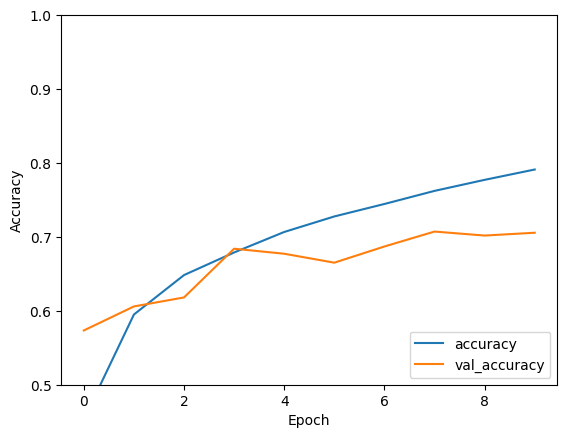

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


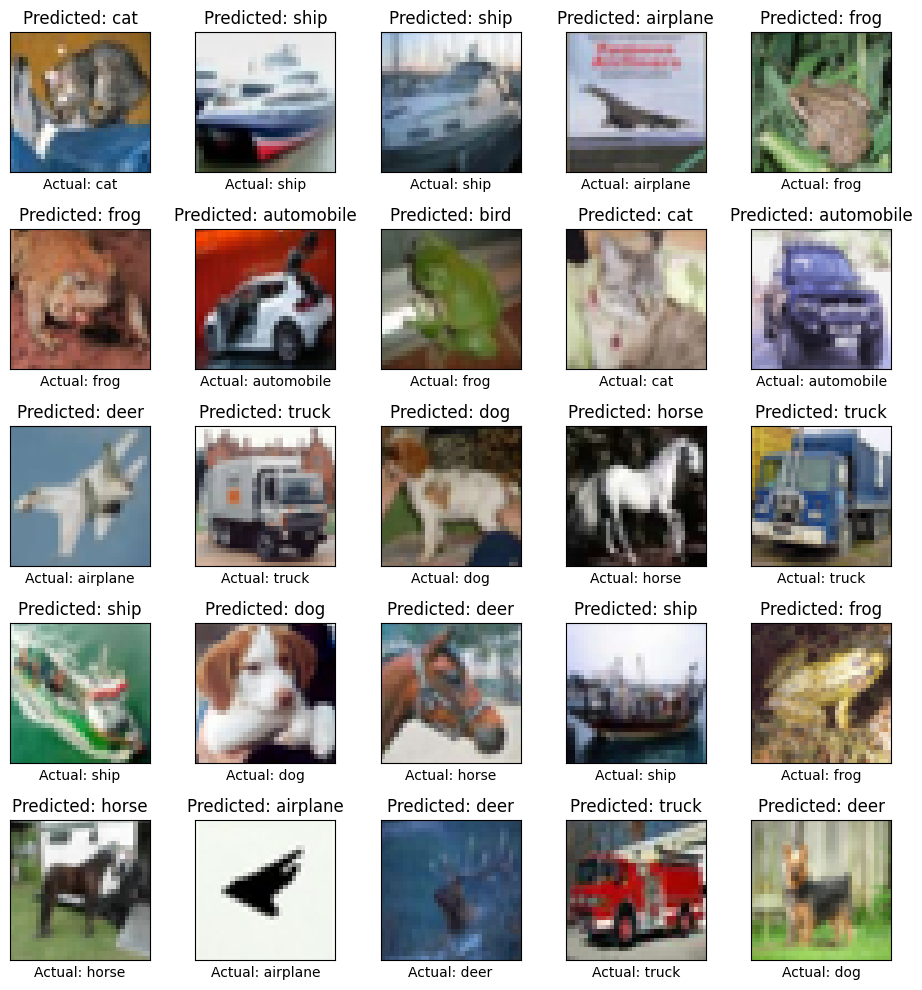

In [135]:
# Load the data
cifar = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Divide the values by 255
train_images, test_images = train_images / 255, test_images / 255

# Plot the first 25 images in the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Configure the layers
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Display the model's architecture
model.summary()

# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Create the accuracy plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Make predictions
predictions = model.predict(test_images)

# Plot the images for the first 25 predictions
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.gca().set_title(f'Predicted: {class_names[np.argmax(predictions[i])]}')
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(f'Actual: {class_names[test_labels[i][0]]}')
    plt.tight_layout()
plt.show()

In [ ]:
#-------------------------------

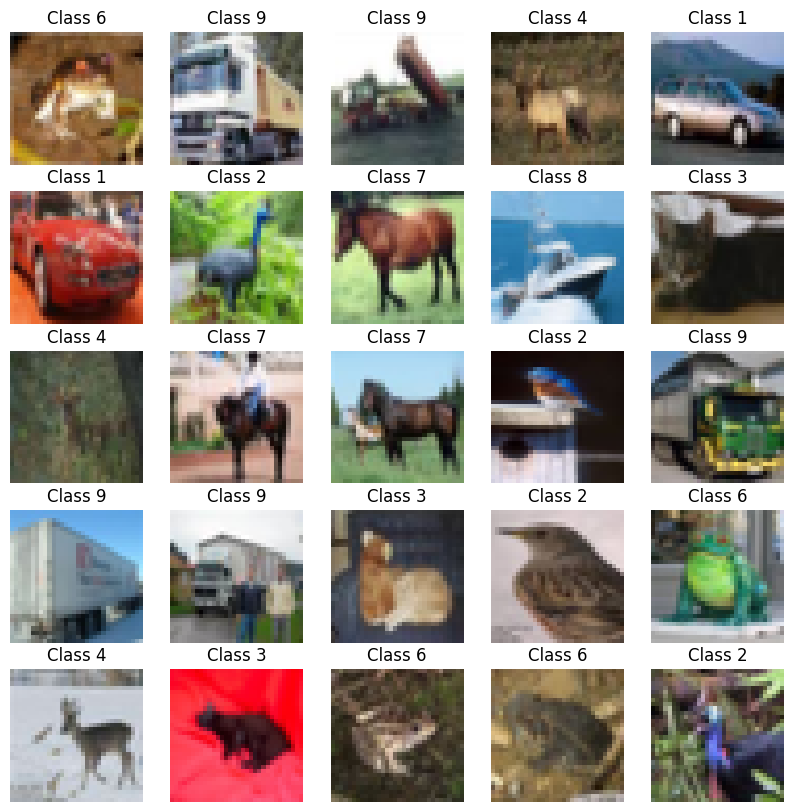

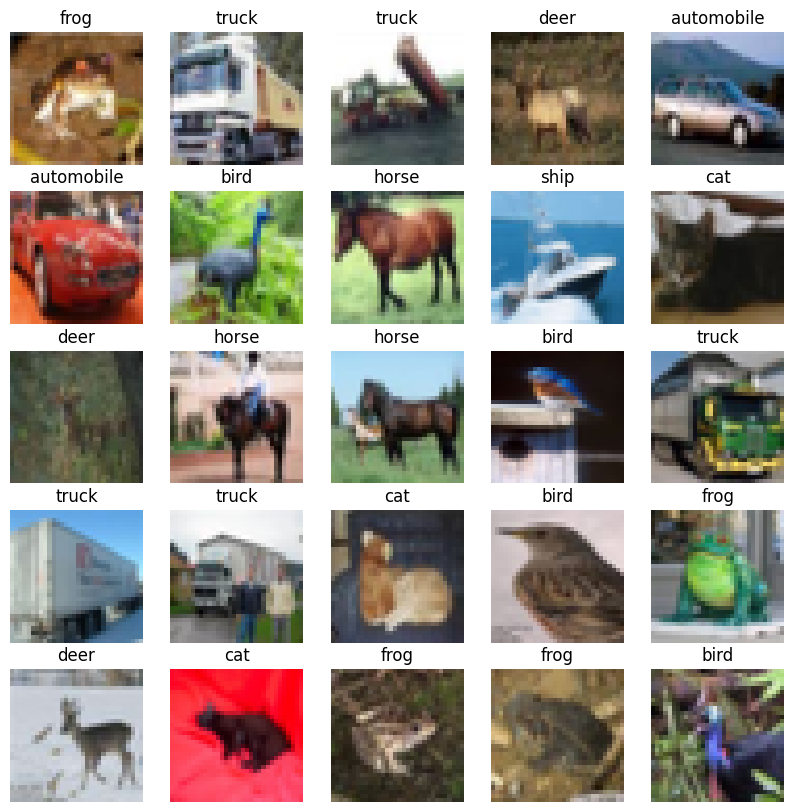

In [131]:
(x_train, y_train), (_, _) = cifar10.load_data()

# Display images with class labels(as numbers)
plt.figure(figsize=(10, 10))
for i in range(25): 
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class {y_train[i][0]}")
    plt.axis('off')
plt.show()

(x_train, y_train), (_, _) = cifar10.load_data()
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
 
# Display images with class names
plt.figure(figsize=(10, 10))
for i in range(25):  
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [ ]:
#---------------------------------------------

In [137]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.1004 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0978 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0972 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.1012 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.0978 -